In [1]:
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

project_dir = '..'

sys.path.append(project_dir)

from utils.odor_utils import load_door_data

In [2]:
df_door_mappings, df_door_odor, df_door_response_matrix, df_odor_response_matrix = load_door_data(home_dir=project_dir)

In [3]:
glom_names = np.array(['DA1', 'VC5', 'VA1v', 'VA1d', 'VA2', 'VA6', 'DM1', 'DL3', 'DL1',
       'VL2a', 'VM4', 'VM5d', 'DM2', 'VL1', 'DM3', 'DM4', 'DM6', 'DL4',
       'VC3l', 'DC3', 'VM7d', 'V', 'VL2p', 'VM1', 'VC3m', 'DC1', 'DL5',
       'D', 'DP1m', 'VM5v', 'DA3', 'VC4', 'DA2', 'VA7m', 'VA3', 'DP1l',
       'DC4', 'VC2', 'VA4', 'DC2', 'VM7v', 'DM5', 'DL2v', 'VM3', 'VC1',
       'VA5', 'DL2d', 'VA7l', 'DA4l', 'DA4m', 'VM2'])

In [4]:
# map glomerulus names to DoOR receptors
glom_df = (df_door_mappings[(df_door_mappings.code.isin(glom_names)) &
                             (df_door_mappings.index.isin(df_odor_response_matrix.columns))]
                .reset_index().set_index('code').rename_axis('model_glom').reindex(glom_names))

In [5]:
all_odors = ['4-methylcyclohexanol', '3-octanol']



bhand_odors = np.array(['benzaldehyde', 
                        'butyric acid',
                        '2,3-butanedione',
                        '1-butanol',
                        'cyclohexanone',
                        'Z3-hexenol', # originally 'cis-3-hexen-1-ol',
                        'ethyl butyrate',
                        'ethyl acetate',
                        'geranyl acetate',
                        'isopentyl acetate', # originally 'isoamyl acetate',
                        '4-methylphenol', # originally '4-methyl phenol',
                        'methyl salicylate',
                        '3-methylthio-1-propanol',
                        'octanal',
                        '2-octanone',
                        'pentyl acetate', 
                        'E2-hexenal', # originally 'trans-2-hexenal',
                        'gamma-valerolactone'])

mac_odors = np.array(['3-octanol',
                        '1-hexanol',
                        'ethyl lactate',
                        #'citronella',
                        '2-heptanone',
                        '1-pentanol',
                        'ethanol',
                        'geranyl acetate',
                        'hexyl acetate',
                        '4-methylcyclohexanol',
                        'pentyl acetate',
                        '1-butanol'])

all_odors = np.union1d(bhand_odors, mac_odors)

In [6]:
odor_door_vals = []
for odor_name in all_odors:
    or_response = (df_odor_response_matrix.T[odor_name]
                                   .rename_axis('receptor').reset_index())
    
    odor_glom_responses = (glom_df.reset_index()
                                  .merge(or_response, how='left')
                                  .set_index('model_glom')[odor_name]).loc[glom_names]

    odor_door_vals.append(odor_glom_responses)
df_odor_door = pd.concat(odor_door_vals, 1)

In [7]:
df_odor_door

,1-butanol,1-hexanol,1-pentanol,"2,3-butanedione",2-heptanone,2-octanone,3-methylthio-1-propanol,3-octanol,4-methylcyclohexanol,4-methylphenol,...,ethyl acetate,ethyl butyrate,ethyl lactate,gamma-valerolactone,geranyl acetate,hexyl acetate,isopentyl acetate,methyl salicylate,octanal,pentyl acetate
model_glom,,,,,,,,,,,,,,,,,,,,,
DA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VC5,NaN,NaN,NaN,-0.069228,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.052420
VA1v,-0.064722,-0.123579,-0.087975,-0.007973,-0.012529,-0.051241,-0.067914,-0.059628,0.011426,0.033673,...,-0.005784,-0.039663,-0.074891,-0.057531,0.008279,-0.085304,-0.162325,0.048857,-0.157471,-0.063539
VA1d,-0.000067,0.032495,0.016506,0.023024,0.039313,NaN,0.004076,NaN,NaN,NaN,...,0.010801,-0.018446,-0.014568,NaN,0.002081,0.006148,-0.002139,-0.014589,NaN,0.018476
VA2,-0.014241,0.043886,NaN,0.688787,-0.004311,-0.020998,-0.014241,-0.019173,-0.018813,-0.017218,...,0.125437,0.135221,NaN,0.236958,0.011322,-0.022113,-0.014241,-0.002677,-0.025157,0.028580
VA6,0.071357,0.042173,0.146606,0.017822,0.036441,NaN,0.044593,0.054715,0.023637,-0.001717,...,0.021946,0.020222,0.107047,0.023637,0.706404,0.052274,0.055805,0.014918,NaN,0.032640
DM1,0.018326,0.175205,NaN,0.290612,0.043612,-0.048705,-0.020350,0.062651,-0.011541,0.013428,...,0.609977,0.475099,NaN,-0.022669,0.027271,0.054430,0.183316,0.015627,0.045469,0.255230
DL3,-0.006736,0.021421,0.003307,0.041783,0.104382,NaN,-0.006736,NaN,NaN,NaN,...,-0.004428,-0.021243,0.089986,NaN,-0.012095,0.117823,0.031493,-0.051261,NaN,0.097280
DL1,0.009623,0.019439,0.033549,0.003163,0.016279,0.225560,0.039374,0.118067,0.130675,0.236103,...,0.026009,0.024788,0.084790,0.166854,0.018793,-0.013650,0.419474,0.753420,0.072905,0.030151


In [8]:
df_odor_door.to_csv('df_odor_door_all_odors.csv')

### run ALS_imputations.m on df_odor_door_all_odors.csv
### random seed is 1234

imput_table_txt_path = 'df_odor_door_all_odors_imput_ALS.txt'
df_imput = pd.read_csv(imput_table_txt_path, header=None)
df_imput.index = df_odor_door.index
df_imput.columns = df_odor_door.columns
df_imput.index.name = 'glom'

df_imput.to_csv('df_odor_door_all_odors_imput_ALS.csv')
df_imput = pd.read_csv('df_odor_door_all_odors_imput_ALS.csv', index_col=0)

In [9]:
odors_SORTED = df_odor_door.sum(0).sort_values().index.values[::-1]
gloms_SORTED = df_odor_door.sum(1).sort_values().index.values[::-1]

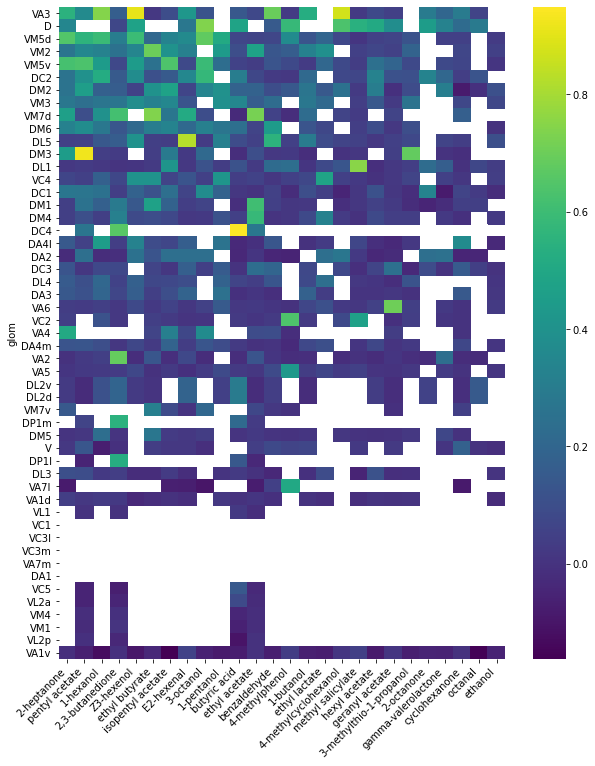

In [10]:
plt.figure(figsize=(10,12))
sns.heatmap(df_odor_door.loc[gloms_SORTED, odors_SORTED], cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

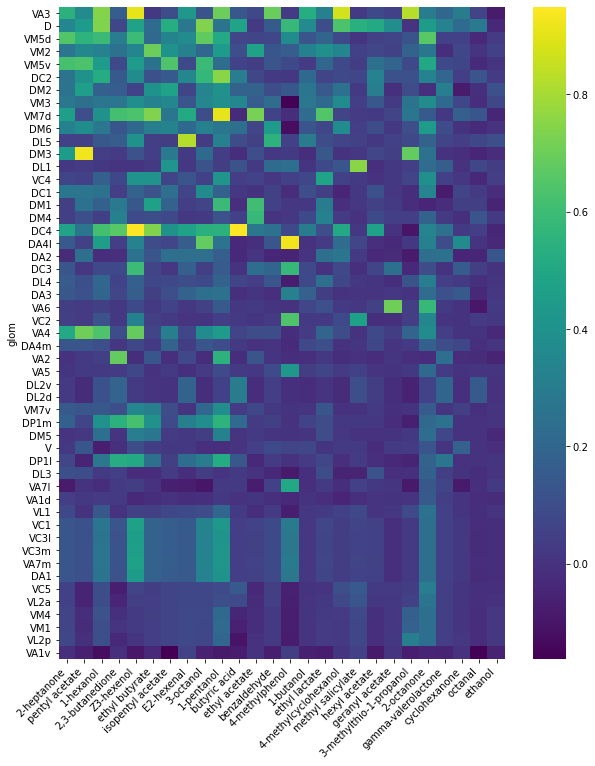

In [11]:
plt.figure(figsize=(10,12))
sns.heatmap(df_imput.loc[gloms_SORTED, odors_SORTED], cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

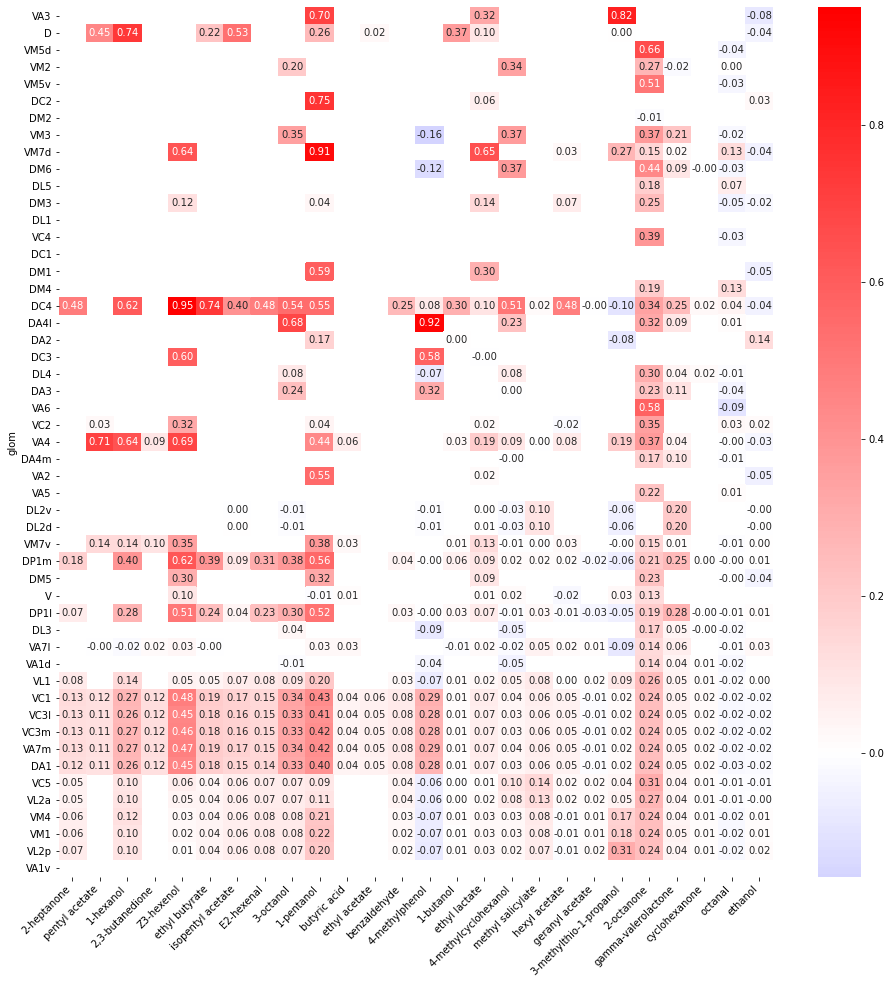

In [12]:
plt.figure(figsize=(16,16))
sns.heatmap(df_imput.mask(~df_odor_door.isna()).loc[gloms_SORTED, odors_SORTED], 
            cmap='bwr', center=0, annot=True, fmt='.2f')
plt.xticks(rotation=45, ha='right')
plt.show()

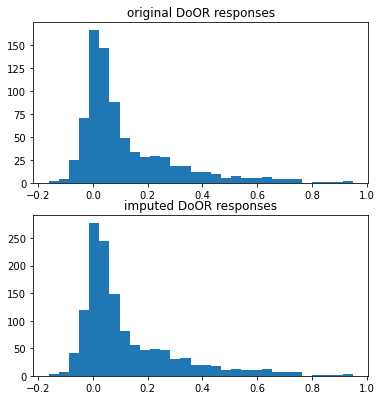

In [13]:
plt.figure(figsize=(6,6.5))
plt.subplot(211)
plt.title('original DoOR responses')
plt.hist(df_odor_door.values.flatten(), bins=30)#, alpha=0.6, density=True)
plt.subplot(212)
plt.title('imputed DoOR responses')
plt.hist(df_imput.values.flatten(), bins=30)#, alpha=0.6, density=True)
plt.show()